In [3]:
import pandas as pd,matplotlib.pyplot as plt,tensorflow as tf,os,seaborn as sns

# importing Data

In [4]:
df=pd.read_csv("weatherHistory.csv")

In [5]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


# Removing columns

In [6]:
remove_cols=["Formatted Date","Loud Cover","Daily Summary"]
df=df.drop(remove_cols,axis=1)
df=df.dropna()
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


# Finding Unique values in Summary

In [7]:
summary_types=df["Summary"].nunique()
summary_types

27

In [8]:
summary_types_text=df["Summary"].unique()
summary_types_text

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

# Finding Unique values in Precip

In [9]:
precip_types=df["Precip Type"].nunique()
precip_types_text=df["Precip Type"].unique()
precip_types,precip_types_text

(2, array(['rain', 'snow'], dtype=object))

# Histogram

(array([   54.,   494.,  3550., 15382., 20295., 20103., 19210., 11329.,
         4833.,   686.]),
 array([-21.82222222, -15.64944444,  -9.47666667,  -3.30388889,
          2.86888889,   9.04166667,  15.21444444,  21.38722222,
         27.56      ,  33.73277778,  39.90555556]),
 <BarContainer object of 10 artists>)

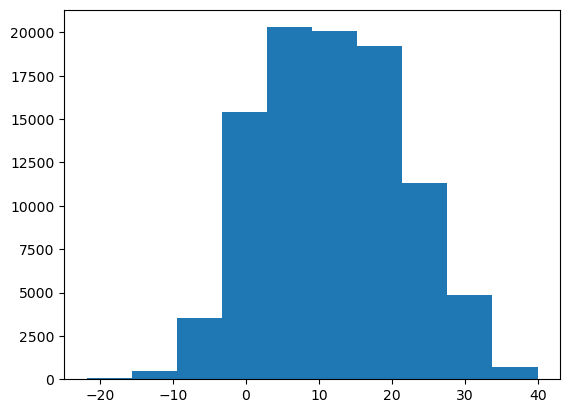

In [10]:
plt.hist(df["Temperature (C)"])

In [11]:
df["Temperature (C)"]

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 95936, dtype: float64

# Applying Boxplot

## Looking for outliers

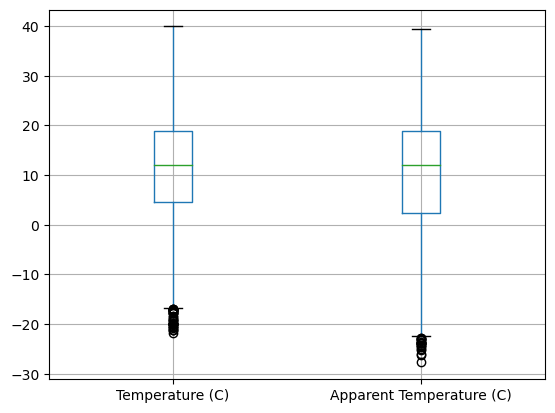

In [12]:
bx_temp=df.boxplot(column=["Temperature (C)","Apparent Temperature (C)"])

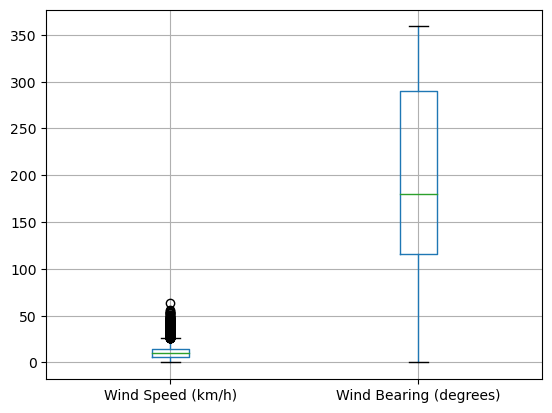

In [13]:
bx_wind=df.boxplot(column=["Wind Speed (km/h)","Wind Bearing (degrees)"])

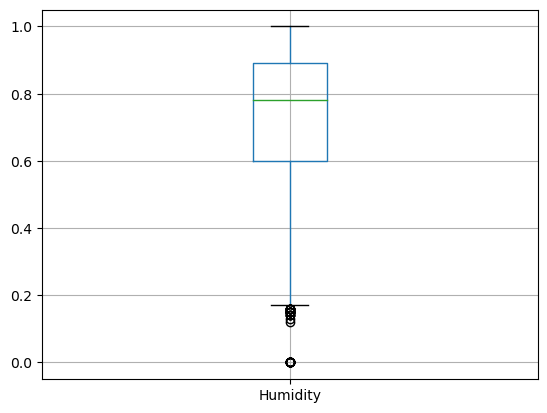

In [14]:
bx_humid=df.boxplot(column=["Humidity"])

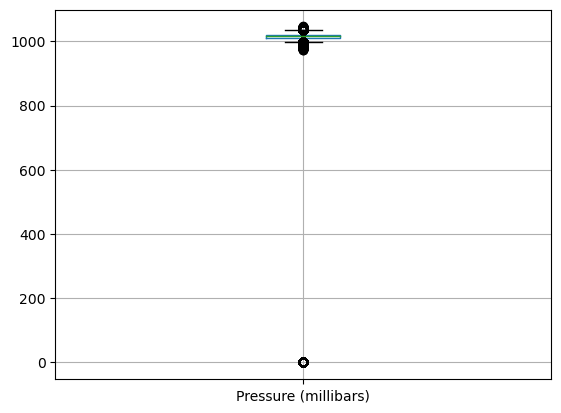

In [15]:
bx_press=df.boxplot(column=["Pressure (millibars)"])

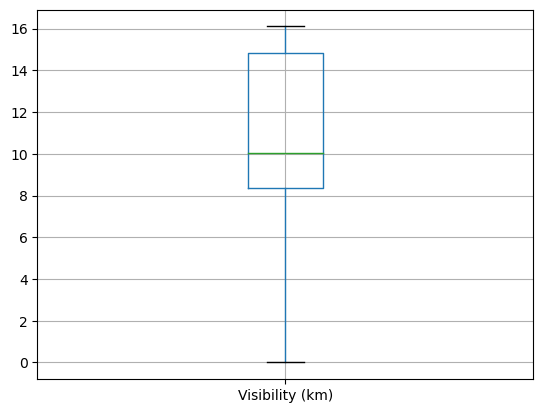

In [16]:
bx_vis=df.boxplot(column=["Visibility (km)"])

# Applying Functions and removing outliers

In [17]:
# Removing outliers
columns_to_clean = [
    "Temperature (C)",
    "Apparent Temperature (C)",
    "Humidity",
    "Wind Speed (km/h)",
    "Wind Bearing (degrees)",
    "Visibility (km)",
    "Pressure (millibars)",
]

# Function to remove outliers using IQR method
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Apply the function to each specified column
for col in columns_to_clean:
    remove_outliers(col)

In [18]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95


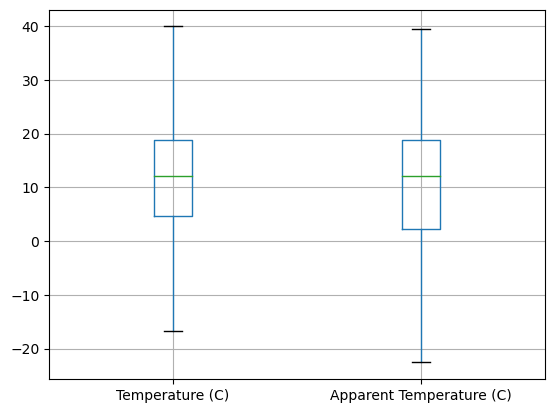

In [19]:
bx_temp=df.boxplot(column=["Temperature (C)","Apparent Temperature (C)"])

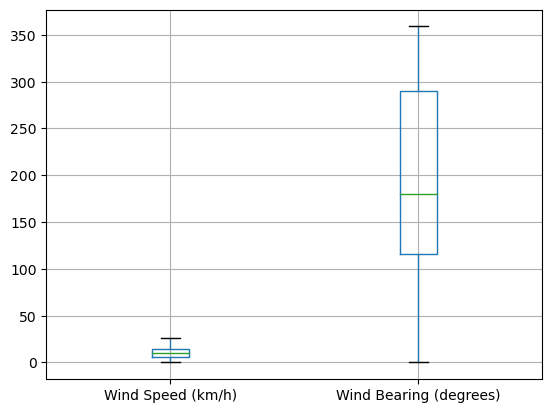

In [20]:
bx_wind=df.boxplot(column=["Wind Speed (km/h)","Wind Bearing (degrees)"])

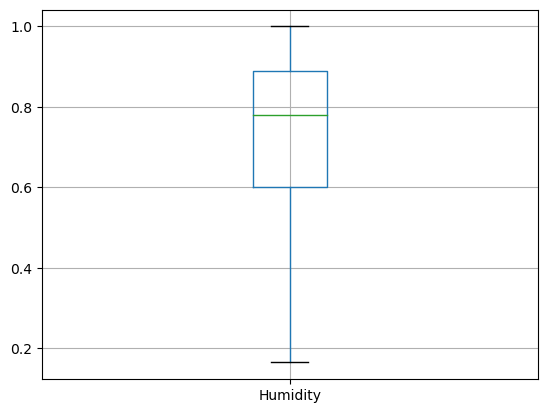

In [21]:
bx_humid=df.boxplot(column=["Humidity"])

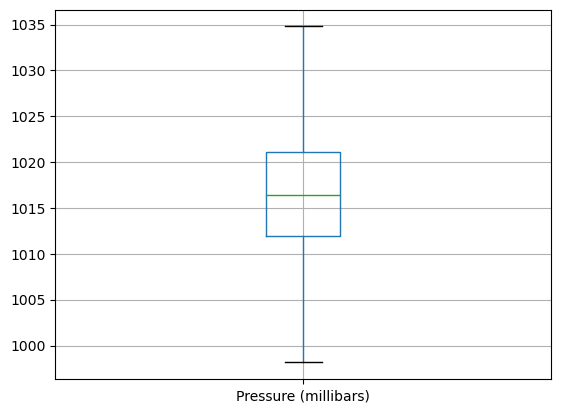

In [22]:
bx_press=df.boxplot(column=["Pressure (millibars)"])

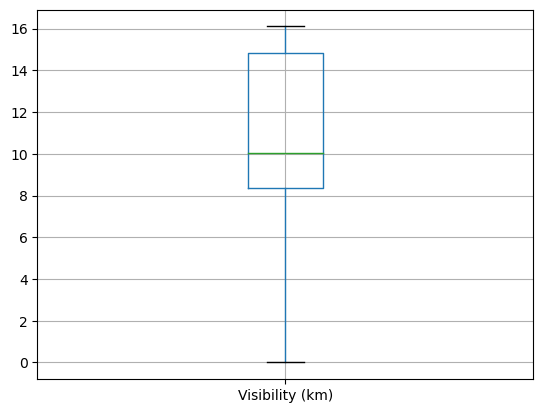

In [23]:
bx_vis=df.boxplot(column=["Visibility (km)"])

# Converting Categorical to Numerical

In [25]:
summary_types_text

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [26]:
precip_types_text

array(['rain', 'snow'], dtype=object)

# importing LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder

# Applying LabelEncoder

In [28]:
columns_to_encode = ['Summary', 'Precip Type']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode each specified column
for col in columns_to_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])


In [29]:
df=df.drop(columns=columns_to_encode)

In [30]:
df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_encoded,Precip Type_encoded
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,19,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,19,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,17,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,19,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,17,0
...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,19,0
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,19,0
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,19,0
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,19,0
